# PCA

In [1]:
import pandas as pd
import sklearn as sk
from sklearn import datasets, decomposition, preprocessing
import seaborn as sb

Load Data

In [2]:
df = sk.datasets.load_wine() 

df_wine = pd.DataFrame(df.data)

df_wine.columns = df.feature_names

df_wine.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


Scale

In [3]:
scaler = preprocessing.StandardScaler()

In [4]:
df_wine_scale = pd.DataFrame(scaler.fit_transform(df_wine))

df_wine_scale.columns = df_wine.columns

df_wine_scale.head(5)

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,1.913905,0.808997,1.034819,-0.659563,1.224884,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,0.018145,0.568648,0.733629,-0.820719,-0.544721,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,0.088358,0.808997,1.215533,-0.498407,2.135968,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,0.930918,2.491446,1.466525,-0.981875,1.032155,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,1.281985,0.808997,0.663351,0.226796,0.401404,-0.319276,0.362177,0.449601,-0.037874


Compression

In [5]:
pca = decomposition.PCA(n_components=3)

In [6]:
pca.fit(df_wine_scale)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

Loadings

In [7]:
df_components = pd.DataFrame(pca.components_)

df_components.columns = df_wine_scale.columns

df_components

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
1,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
2,-0.207383,0.089013,0.626224,0.612080,0.130757,0.146179,0.150682,0.170368,0.149454,-0.137306,0.085222,0.166005,-0.126746


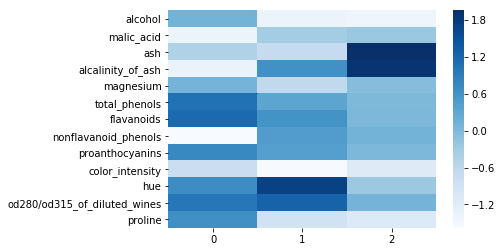

In [8]:
df_components_t = df_components.T

df_norm_col=(df_components_t-df_components_t.mean())/df_components_t.std()

sb.heatmap(df_norm_col, cmap="Blues")

Transform

In [9]:
df_wine_transform = pd.DataFrame(pca.transform(df_wine_scale))

df_wine_transform.head(5)

,0,1,2
0,3.316751,-1.443463,-0.165739
1,2.209465,0.333393,-2.026457
2,2.516740,-1.031151,0.982819
3,3.757066,-2.756372,-0.176192
4,1.008908,-0.869831,2.026688


Correlations with PC1

In [10]:
df_corr = pd.concat([df_wine_transform[[0]], df_wine_scale], axis = 1)

df_corr.corr()[0]

0                               1.000000
alcohol                         0.313093
malic_acid                     -0.531885
ash                            -0.004449
alcalinity_of_ash              -0.519157
magnesium                       0.308023
total_phenols                   0.856137
flavanoids                      0.917470
nonflavanoid_phenols           -0.647607
proanthocyanins                 0.679922
color_intensity                -0.192236
hue                             0.643662
od280/od315_of_diluted_wines    0.816019
proline                         0.622051
Name: 0, dtype: float64